# Random Forest

Decision trees are one of such models which have low bias but high variance. We have studied that decision trees tend to overfit the data. So bagging technique becomes a very good solution for decreasing the variance in a decision tree. Instead of using a bagging model with underlying model as a decision tree, we can also use Random forest which is more convenient and well optimized for decision trees. The main issue with bagging is that there is not much independence among the sampled datasets i.e. there is correlation. The advantage of random forests over bagging models is that the random forests makes a tweak in the working algorithm of bagging model to decrease the correlation in trees. The idea is to introduce more randomness while creating trees which will help in reducing correlation.



Let’s understand how algorithm works for a random forest model:

1) Just like in bagging, different samples are collected from the training dataset using bootstraping.

2) On each sample we train our tree model and we allow the trees to grow with high depths.

Now, the difference with in random forest is how the trees are formed. In bootstraping we allow all the sample data to be used for splitting the nodes but not   with random forests.  When building a decision tree, each time a split is to happen, a random sample of ‘m’ predictors are chosen from the total ‘p’ predictors. Only those ‘m’ predictors are allowed to be used for the split.

Why is that?

Suppose in those ‘p’ predictors, 1 predictor is very strong. Now each sample this predictor will remain the strongest. So, whenever trees will be built for these sampled data, this predictor will be chosen by all the trees for splitting and thus will result in similar kind of tree formation for each bootstrap model. This introduces correlation in the dataset and averaging correlated dataset results do not lead low variance. That’s why in random forest the choice for selecting node for split is limited and it introduces randomness in the formation of the trees as well.
Most of the predictors are not allowed to be considered for split.


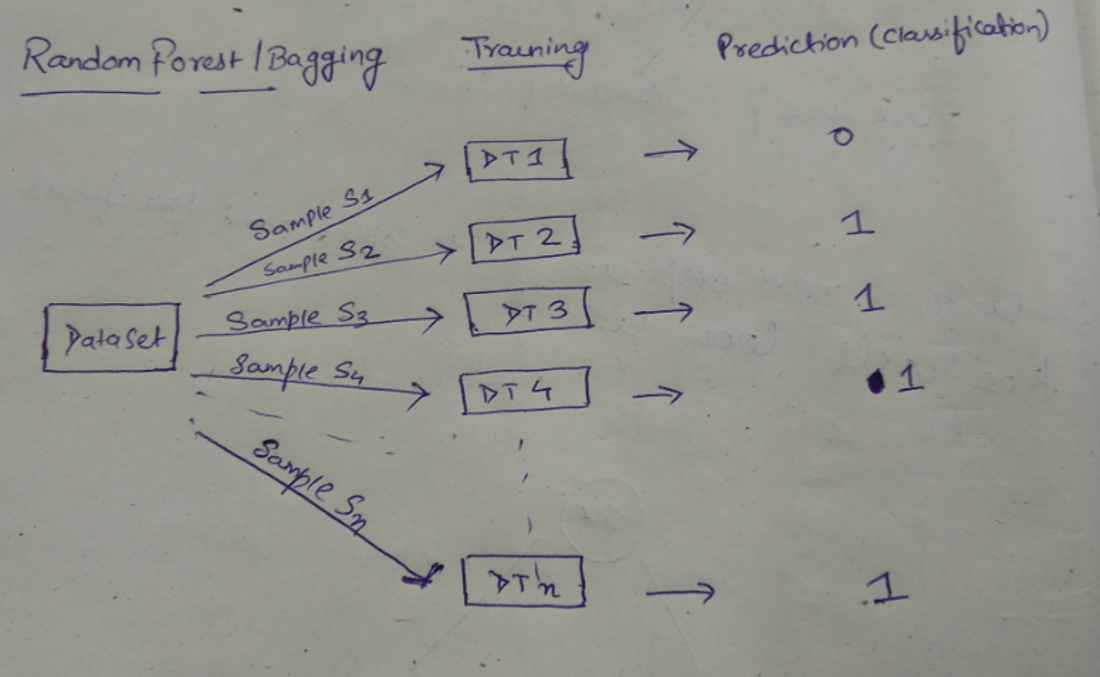

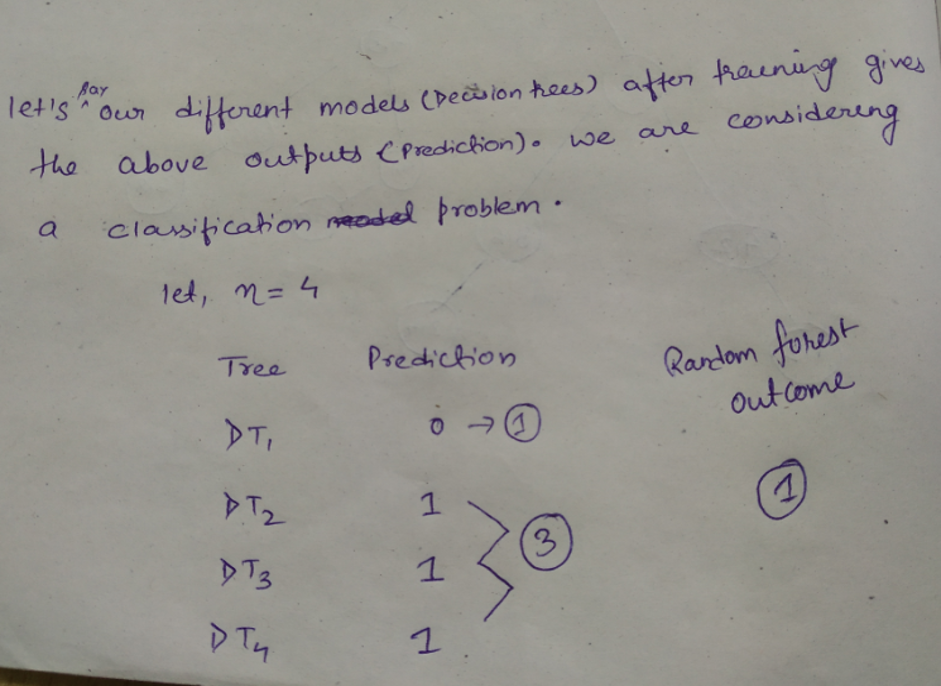

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix



In [ ]:
data = pd.read_csv("winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
X = data.drop(columns = 'quality')
y = data['quality']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state= 355)

In [ ]:
clf = DecisionTreeClassifier( min_samples_split= 2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6025

In [ ]:
#let's first visualize the tree on the data without doing any pre processing
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf2.score(x_test,y_test)

0.6

In [ ]:
rand_clf = RandomForestClassifier(random_state=6)

In [ ]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [ ]:
grid_search.fit(x_train,y_train) #Expensive computation 

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3868 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4604 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 5404 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 6268 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                   

In [ ]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 115}

In [ ]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 18,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 6,
 n_estimators = 115,random_state=6)

In [ ]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [ ]:
rand_clf.score(x_test,y_test)

0.695

In [ ]:
## Approx 10% better performance of random forest on test as compared to single DT